#### Financial Perfomance Analysis

In [13]:
import os
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pd.options.display.max_columns = None

##### laod data

In [62]:
PATH = 'Finance_Data'
col_names = []
Folders = os.listdir(PATH)
data = pd.DataFrame()
for folderName in Folders:
    path = os.path.join(PATH, folderName)
    for file in os.listdir(path):
        full_path = os.path.join(path, file)
        df = pd.read_excel(full_path, sheet_name="Sheet1")
        df["file_name"] = file.split('.')[0].split('_')[1]
        data = pd.concat([data, df])
        data = data.reset_index(drop=True)
data.head()

,DATE,LOCATION,ITEM,COST,TOTAL,COMMENTS,file_name
0,2018-12-01 00:00:00,Shirley,Rent,-670.00,NaN,NaN,2018
1,2018-12-03 00:00:00,Superstore,Food,-36.91,NaN,NaN,2018
2,2018-12-09 00:00:00,Safeway,Food,-0.73,NaN,NaN,2018
3,2018-12-08 00:00:00,Subway,Food,-8.39,NaN,NaN,2018
4,2018-12-11 00:00:00,Safeway,Food,-3.25,NaN,NaN,2018


In [63]:
data.shape

(1067, 7)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       1067 non-null   object 
 1   LOCATION   1067 non-null   object 
 2   ITEM       1067 non-null   object 
 3   COST       1067 non-null   float64
 4   TOTAL      0 non-null      float64
 5   COMMENTS   162 non-null    object 
 6   file_name  1067 non-null   object 
dtypes: float64(2), object(5)
memory usage: 58.5+ KB


In [65]:
data["DATE"] = pd.to_datetime(data["DATE"], errors="coerce")
data["file_name"] = pd.to_datetime(data["file_name"], errors="coerce", format="%Y")
data = data.drop('TOTAL', axis=1)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       1064 non-null   datetime64[ns]
 1   LOCATION   1067 non-null   object        
 2   ITEM       1067 non-null   object        
 3   COST       1067 non-null   float64       
 4   COMMENTS   162 non-null    object        
 5   file_name  1067 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 50.1+ KB


In [67]:
data.head()

,DATE,LOCATION,ITEM,COST,COMMENTS,file_name
0,2018-12-01,Shirley,Rent,-670.00,NaN,2018-01-01
1,2018-12-03,Superstore,Food,-36.91,NaN,2018-01-01
2,2018-12-09,Safeway,Food,-0.73,NaN,2018-01-01
3,2018-12-08,Subway,Food,-8.39,NaN,2018-01-01
4,2018-12-11,Safeway,Food,-3.25,NaN,2018-01-01


In [68]:
data["COST"].describe()

count    1067.000000
mean      -33.132687
std       101.209133
min      -670.000000
25%       -21.000000
50%       -10.490000
75%        -5.510000
max        -0.300000
Name: COST, dtype: float64

#### Group date and calculate total cost for each date

In [76]:
date_group = data.groupby('DATE').agg({"COST":"sum"}).sort_values("DATE", ascending=True)
date_group.reset_index(inplace=True)
date_group.head()

,DATE,COST
0,2018-08-16,-56.37
1,2018-09-01,-670.00
2,2018-09-02,-58.46
3,2018-09-05,-13.49
4,2018-09-07,-5.35


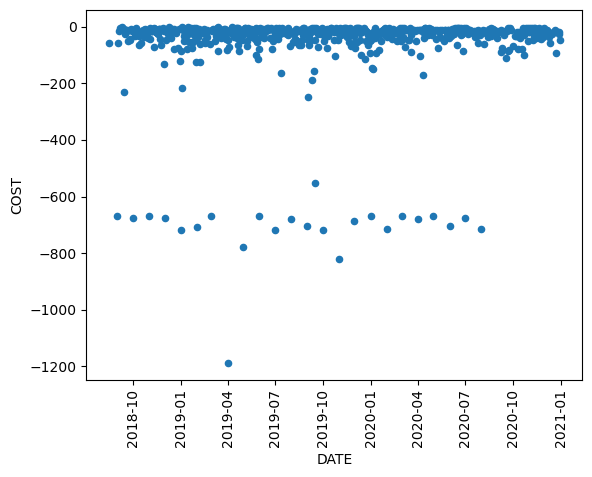

In [80]:
date_group.plot(kind="scatter", x="DATE", y="COST")
plt.xticks(rotation=90)
plt.show()

In [97]:
loc_group = data.groupby(['DATE', 'LOCATION', 'ITEM']).agg({"COST":"sum"}).sort_values("DATE", ascending=True)
loc_group.reset_index(inplace=True)
loc_group.head()

,DATE,LOCATION,ITEM,COST
0,2018-08-16,Superstore,Food,-56.37
1,2018-09-01,Shirley,Rent,-670.00
2,2018-09-02,Wal-Mart,Personal Items,-58.46
3,2018-09-05,Blaze Pizza,Food,-13.49
4,2018-09-07,Safeway,Food,-5.35


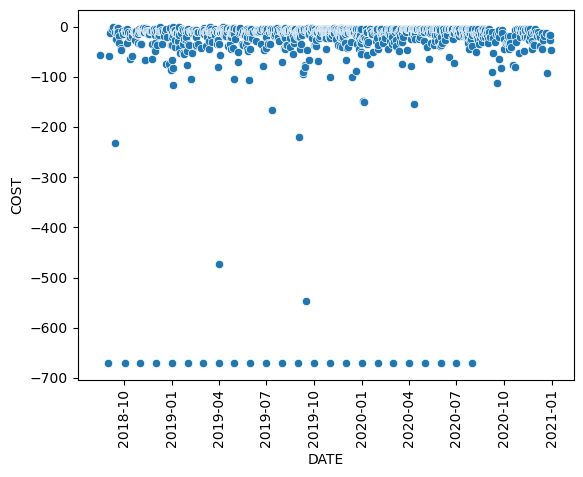

In [99]:
sns.scatterplot(data=loc_group, x="DATE", y="COST")
plt.xticks(rotation=90)
plt.show()

In [100]:
data.to_csv("finance_data.csv")